
















































































































# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from matplotlib.dates import YearLocator 

In [2]:
import datetime as dt
from datetime import timedelta

In [3]:
from scipy.stats import ttest_ind

In [4]:
df=pd.read_csv('weatherHistory.csv')

# Data Description

## Shape

In [5]:
print('no.of rows:',df.shape[0],'\nNo.of columns:',df.shape[1])

no.of rows: 96453 
No.of columns: 12


In [6]:
df.rename(columns={'Precip Type': 'Precip_Type',
                   'Formatted Date':'Formatted_Date',
                   'Apparent Temperature (C)':'Apparent_Temperature(C)',
                   'Temperature (C)':'Temperature(C)',
                  'Wind Speed (km/h)':'Wind_Speed(km/h)',
                  'Wind Bearing (degrees)':'Wind_Bearing(degrees)',
                  'Visibility (km)':'Visibility(km)',
                  'Loud Cover':'Loud_Cover',
                  'Pressure (millibars)':'Pressure(millibars)',
                  'Daily Summary':'Daily_Summary'}, inplace=True)

## Dtypes

In [7]:
types=df.dtypes
col_type_details=pd.DataFrame(types,columns=['data_type'])

In [8]:
col_type_details

,data_type
Formatted_Date,object
Summary,object
Precip_Type,object
Temperature(C),float64
Apparent_Temperature(C),float64
Humidity,float64
Wind_Speed(km/h),float64
Wind_Bearing(degrees),float64
Visibility(km),float64
Loud_Cover,float64


## Head

In [9]:
df.head()

,Formatted_Date,Summary,Precip_Type,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Loud_Cover,Pressure(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Data Understanding

* **Formated Date           :** Contains the Date(yyyy-mm-dd) and time(hh:mm:ss:ms , timezone) information when the data is recored
* **Summary                 :** Describes the weather type at particular point of time
* **precip type             :** containts precepitation types (drizzle, rain, sleet, snow, ice pellets, graupel, and hail)
* **Temperature(c)          :** Temperature at particular point of time in clesius
* **Apparent Temperature (C):** feels like temperature at particular point of time in celsius
* **Humidity                :** humidty level at particular point of time
* **Wind Speed (km/h)       :** contains windspeed in kmph at particular point of time
* **Wind Bearing (degrees)  :** direction from which wind is blowing in degrees
* **Visibility (km)         :** contains visibilty range at particular point of time in km
* **Loud Cover              :**
* **Pressure (millibars)    :** pressure information at particular point of time in millibars
* **Daily Summary           :** Has short information the weather throughout the day

## Tail

In [10]:
df.tail()

,Formatted_Date,Summary,Precip_Type,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Loud_Cover,Pressure(millibars),Daily_Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


# info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Formatted_Date           96453 non-null  object 
 1   Summary                  96453 non-null  object 
 2   Precip_Type              95936 non-null  object 
 3   Temperature(C)           96453 non-null  float64
 4   Apparent_Temperature(C)  96453 non-null  float64
 5   Humidity                 96453 non-null  float64
 6   Wind_Speed(km/h)         96453 non-null  float64
 7   Wind_Bearing(degrees)    96453 non-null  float64
 8   Visibility(km)           96453 non-null  float64
 9   Loud_Cover               96453 non-null  float64
 10  Pressure(millibars)      96453 non-null  float64
 11  Daily_Summary            96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [12]:
# Finding and count null values in each column
null_counts = df.isnull().sum()

# Displaying the null counts for each column
print(null_counts)

Formatted_Date               0
Summary                      0
Precip_Type                517
Temperature(C)               0
Apparent_Temperature(C)      0
Humidity                     0
Wind_Speed(km/h)             0
Wind_Bearing(degrees)        0
Visibility(km)               0
Loud_Cover                   0
Pressure(millibars)          0
Daily_Summary                0
dtype: int64


# Data Cleaning

### checking for repeated or missing values in Dataset if any are present represnting them 


In [13]:
# Checking for duplicate rows
duplicates = df[df.duplicated()]


In [14]:
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")


Duplicate Rows:
                      Formatted_Date        Summary Precip_Type  \
36072  2010-08-02 00:00:00.000 +0200          Clear        rain   
36073  2010-08-02 01:00:00.000 +0200          Clear        rain   
36074  2010-08-02 02:00:00.000 +0200          Clear        rain   
36075  2010-08-02 03:00:00.000 +0200          Clear        rain   
36076  2010-08-02 04:00:00.000 +0200          Clear        rain   
36077  2010-08-02 05:00:00.000 +0200          Clear        rain   
36078  2010-08-02 06:00:00.000 +0200          Clear        rain   
36079  2010-08-02 07:00:00.000 +0200          Clear        rain   
36080  2010-08-02 08:00:00.000 +0200          Clear        rain   
36081  2010-08-02 09:00:00.000 +0200          Clear        rain   
36082  2010-08-02 10:00:00.000 +0200          Clear        rain   
36083  2010-08-02 11:00:00.000 +0200          Clear        rain   
36084  2010-08-02 12:00:00.000 +0200          Clear        rain   
36085  2010-08-02 13:00:00.000 +0200  Partly C

In [15]:
# Checking for missing values
missing_values = df[df.isnull().any(axis=1)]


In [16]:
if not missing_values.empty:
    print("\nRows with Missing Values:")
    print(missing_values)
else:
    print("\nNo rows with missing values found.")



Rows with Missing Values:
                      Formatted_Date        Summary Precip_Type  \
52672  2012-04-11 16:00:00.000 +0200  Mostly Cloudy         NaN   
52674  2012-04-11 18:00:00.000 +0200  Mostly Cloudy         NaN   
52675  2012-04-11 19:00:00.000 +0200  Mostly Cloudy         NaN   
52677  2012-04-11 21:00:00.000 +0200  Mostly Cloudy         NaN   
52678  2012-04-11 22:00:00.000 +0200  Mostly Cloudy         NaN   
...                              ...            ...         ...   
95584  2016-10-31 19:00:00.000 +0100  Mostly Cloudy         NaN   
95585  2016-10-31 20:00:00.000 +0100  Mostly Cloudy         NaN   
95586  2016-10-31 21:00:00.000 +0100  Mostly Cloudy         NaN   
95587  2016-10-31 22:00:00.000 +0100  Partly Cloudy         NaN   
95588  2016-10-31 23:00:00.000 +0100  Mostly Cloudy         NaN   

       Temperature(C)  Apparent_Temperature(C)  Humidity  Wind_Speed(km/h)  \
52672       19.016667                19.016667      0.26           14.8764   
52674       

### finding any null values are present in the dataset and if any found replacing them with proper values

#### Missing Values


In [17]:
missing_values = df.isnull().sum()

In [18]:
# Printing the columns with missing values and their counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Precip_Type    517
dtype: int64


#### Precip_Type column has the missing values so i am filling them with mode

In [19]:
missing_values2 = df['Precip_Type'].isnull()

# Use the index of the DataFrame to get the row numbers
missing_locations = missing_values2[missing_values2].index

# Print the row numbers where "Precip_Type" has missing values
print("Locations (row numbers) with missing values in 'Precip_Type':")
for location in missing_locations:
    print(location)

Locations (row numbers) with missing values in 'Precip_Type':
52672
52674
52675
52677
52678
52680
52681
52683
52684
52687
52692
52693
52695
52696
52698
52699
52701
52702
52704
52705
52707
52708
52710
52714
52716
52717
52719
52720
52722
52723
52725
52726
52740
52746
52747
52749
52750
52752
52753
52755
52756
52758
52759
52761
52762
52764
52765
52767
52768
52770
52771
52773
52774
52776
52779
52780
52782
52783
52785
52786
52788
52789
52791
52794
52795
52797
52798
52800
52801
52818
52819
52825
52828
52830
52831
52833
52836
52837
58868
58869
58872
58874
58875
58877
58881
58883
58884
58886
58889
58892
58893
58895
58896
58898
58899
58901
58902
58905
58907
58908
58910
58914
58916
58919
58920
58922
58925
58926
58928
58929
58931
58934
58935
58937
58941
58943
58944
58946
58947
58952
58953
58956
58958
58959
58961
58962
58964
58965
58967
58968
59025
59031
59033
59034
59036
59037
59039
59042
59043
59045
59046
59048
59049
94268
94269
94270
94271
94272
94273
94274
94275
94276
94277
94278
94279
94280
94

#### Calculating the mode (most frequent value) of the "Precip_Type" column and filling missing values withit

In [20]:
# Calculating the mode (most frequent value) of the "Precip_Type" column
mode_value = df['Precip_Type'].mode()[0]

# Fill missing values in the "Precip_Type" column with the mode value
df['Precip_Type'].fillna(mode_value, inplace=True)

In [21]:
missing_values5 = df.isna()
missing_counts5 = missing_values5.sum()
print("Columns with missing values and their counts:")
print(missing_counts5)

Columns with missing values and their counts:
Formatted_Date             0
Summary                    0
Precip_Type                0
Temperature(C)             0
Apparent_Temperature(C)    0
Humidity                   0
Wind_Speed(km/h)           0
Wind_Bearing(degrees)      0
Visibility(km)             0
Loud_Cover                 0
Pressure(millibars)        0
Daily_Summary              0
dtype: int64


# Duplicate values

In [22]:
duplicates = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicates)
print("----------------------------------------------------------")
num_duplicate_rows = duplicates.shape[0]
print("Number of Duplicate Rows:", num_duplicate_rows)
print("----------------------------------------------------------")
duplicate_indices = duplicates.index
print("Locations (Row Indices) of Duplicate Rows:")
print(duplicate_indices)

Duplicate Rows:
                      Formatted_Date        Summary Precip_Type  \
36072  2010-08-02 00:00:00.000 +0200          Clear        rain   
36073  2010-08-02 01:00:00.000 +0200          Clear        rain   
36074  2010-08-02 02:00:00.000 +0200          Clear        rain   
36075  2010-08-02 03:00:00.000 +0200          Clear        rain   
36076  2010-08-02 04:00:00.000 +0200          Clear        rain   
36077  2010-08-02 05:00:00.000 +0200          Clear        rain   
36078  2010-08-02 06:00:00.000 +0200          Clear        rain   
36079  2010-08-02 07:00:00.000 +0200          Clear        rain   
36080  2010-08-02 08:00:00.000 +0200          Clear        rain   
36081  2010-08-02 09:00:00.000 +0200          Clear        rain   
36082  2010-08-02 10:00:00.000 +0200          Clear        rain   
36083  2010-08-02 11:00:00.000 +0200          Clear        rain   
36084  2010-08-02 12:00:00.000 +0200          Clear        rain   
36085  2010-08-02 13:00:00.000 +0200  Partly C

In [23]:
# Using the drop_duplicates() method to remove duplicate rows
df = df.drop_duplicates()

In [24]:
duplicates = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicates)
print("----------------------------------------------------------")
num_duplicate_rows = duplicates.shape[0]
print("Number of Duplicate Rows:", num_duplicate_rows)
print("----------------------------------------------------------")
duplicate_indices = duplicates.index
print("Locations (Row Indices) of Duplicate Rows:")
print(duplicate_indices)

Duplicate Rows:
Empty DataFrame
Columns: [Formatted_Date, Summary, Precip_Type, Temperature(C), Apparent_Temperature(C), Humidity, Wind_Speed(km/h), Wind_Bearing(degrees), Visibility(km), Loud_Cover, Pressure(millibars), Daily_Summary]
Index: []
----------------------------------------------------------
Number of Duplicate Rows: 0
----------------------------------------------------------
Locations (Row Indices) of Duplicate Rows:
Int64Index([], dtype='int64')


## Unique Values

In [25]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)
    print(f"Number of unique values: {num_unique}")

Number of unique values: 96429
Number of unique values: 27
Number of unique values: 2
Number of unique values: 7574
Number of unique values: 8984
Number of unique values: 90
Number of unique values: 2484
Number of unique values: 360
Number of unique values: 949
Number of unique values: 1
Number of unique values: 4979
Number of unique values: 214


# describe

In [26]:
df.describe()

,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Loud_Cover,Pressure(millibars)
count,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.0,96429.000000
mean,11.929692,10.851707,0.734902,10.812460,187.497506,10.347225,0.0,1003.232915
std,9.550492,10.695743,0.195466,6.913345,107.376423,4.192548,0.0,116.984300
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.683333,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Are there any unnecessary columns in the dataset, if yes remove them. 

##### (Deleting the column which is not required)
* inplace=True updates the original table after deleting the required column

In [27]:
column_name_to_delete = "Loud_Cover"

In [28]:
df.drop(column_name_to_delete, axis=1,inplace=True)

In [29]:
df.head()

,Formatted_Date,Summary,Precip_Type,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure(millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


# Conversion

In [30]:
df['Temperature(C)']=df['Temperature(C)'].astype('float')
df['Apparent_Temperature(C)']=df['Apparent_Temperature(C)'].astype('float')
df['Humidity']=df['Humidity'].astype('float')
df['Wind_Speed(km/h)']=df['Wind_Speed(km/h)'].astype('float')
df['Wind_Bearing(degrees)']=df['Wind_Bearing(degrees)'].astype('int')
df['Visibility(km)']=df['Visibility(km)'].astype('float')
df['Pressure(millibars)']=df['Pressure(millibars)'].astype('float')

In [31]:
types1=df.dtypes
col_type_details1=pd.DataFrame(types1,columns=['data_type'])

In [32]:
col_type_details1

,data_type
Formatted_Date,object
Summary,object
Precip_Type,object
Temperature(C),float64
Apparent_Temperature(C),float64
Humidity,float64
Wind_Speed(km/h),float64
Wind_Bearing(degrees),int32
Visibility(km),float64
Pressure(millibars),float64


In [33]:
df["Formatted_Date"]=pd.to_datetime(df["Formatted_Date"])

In [34]:
df.head()

,Formatted_Date,Summary,Precip_Type,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure(millibars),Daily_Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


## Analyzing the most frequent weather from the ‘Summary’ column

In [35]:
Weather= df ['Summary'].value_counts().reset_index()
Weather.columns=['Weather','Count']
Weather

,Weather,Count
0,Partly Cloudy,31726
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10873
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


# Outliers

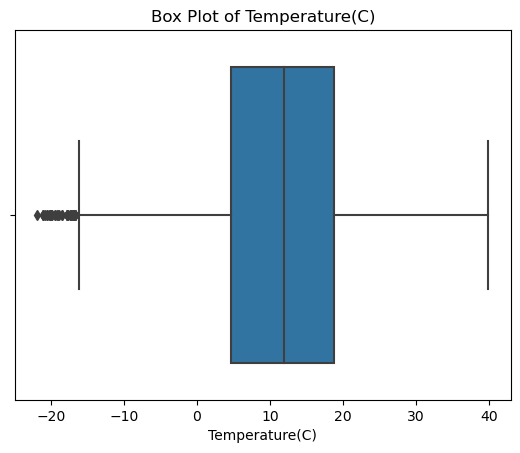

Lower Whisker: -16.55
Upper Whisker: 40.07222222222222
Number of Outliers: 44


In [36]:
column_name = 'Temperature(C)'

# Creating a box plot
sns.boxplot(data=df, x=column_name, orient='v')  # Set orient to 'v' for vertical orientation
plt.xlabel(column_name)
plt.title(f'Box Plot of {column_name}')
plt.show()
# Calculating the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding the outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Print the lower whisker, upper whisker, and number of outliers
print(f"Lower Whisker: {lower_bound}")
print(f"Upper Whisker: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")

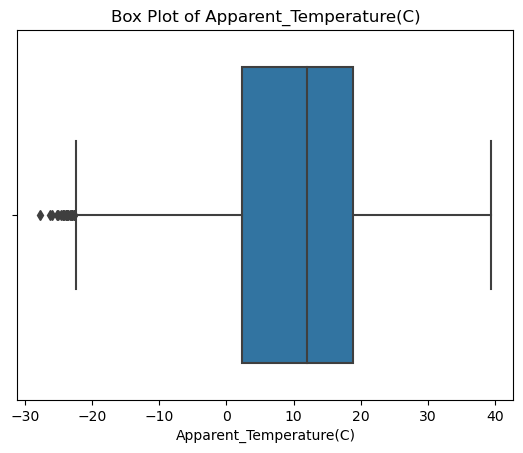

Lower Whisker: -22.480555555555558
Upper Whisker: 43.63055555555556
Number of Outliers: 22


In [37]:
column_name = 'Apparent_Temperature(C)'

# Creating a box plot
sns.boxplot(data=df, x=column_name, orient='v')  # Set orient to 'v' for vertical orientation
plt.xlabel(column_name)
plt.title(f'Box Plot of {column_name}')
plt.show()
# Calculating the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding the outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Print the lower whisker, upper whisker, and number of outliers
print(f"Lower Whisker: {lower_bound}")
print(f"Upper Whisker: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
    

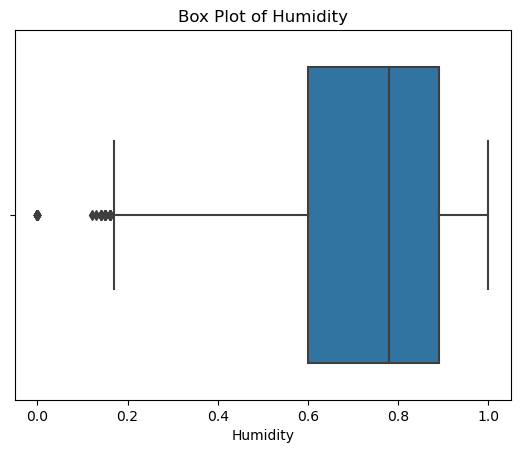

Lower Whisker: 0.16499999999999992
Upper Whisker: 1.3250000000000002
Number of Outliers: 46


In [38]:
column_name = 'Humidity'

# Creating a box plot
sns.boxplot(data=df, x=column_name, orient='v')  # Set orient to 'v' for vertical orientation
plt.xlabel(column_name)
plt.title(f'Box Plot of {column_name}')
plt.show()
# Calculating the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Printing the lower whisker, upper whisker, and number of outliers
print(f"Lower Whisker: {lower_bound}")
print(f"Upper Whisker: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
    

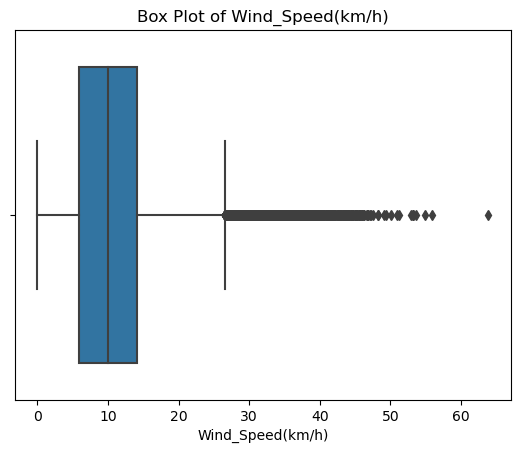

Lower Whisker: -6.633199999999997
Upper Whisker: 26.597199999999997
Number of Outliers: 3028


In [39]:
column_name = 'Wind_Speed(km/h)'

# Create a box plot
sns.boxplot(data=df, x=column_name, orient='v')  # Set orient to 'v' for vertical orientation
plt.xlabel(column_name)
plt.title(f'Box Plot of {column_name}')
plt.show()
# Calculate the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Print the lower whisker, upper whisker, and number of outliers
print(f"Lower Whisker: {lower_bound}")
print(f"Upper Whisker: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
    

In [40]:
# Finding categorical variables
categorical_variables = df.select_dtypes(include=['object'])
if not categorical_variables.empty:
    print("Categorical Vaariables:")
    print(categorical_variables.columns)
else:
    print("No categorical variables found.")

Categorical Vaariables:
Index(['Formatted_Date', 'Summary', 'Precip_Type', 'Daily_Summary'], dtype='object')


### categorical representation of "Precip_type" using "Count Plot"

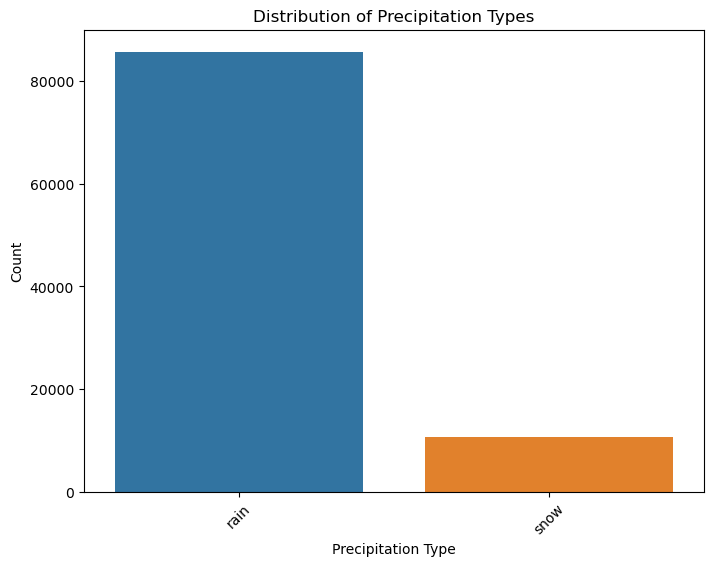

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Precip_Type')
plt.xlabel('Precipitation Type')
plt.ylabel('Count')
plt.title('Distribution of Precipitation Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

### Are there any outliers in the data? If so, use box plots, histograms and visualize.

### Boxplot

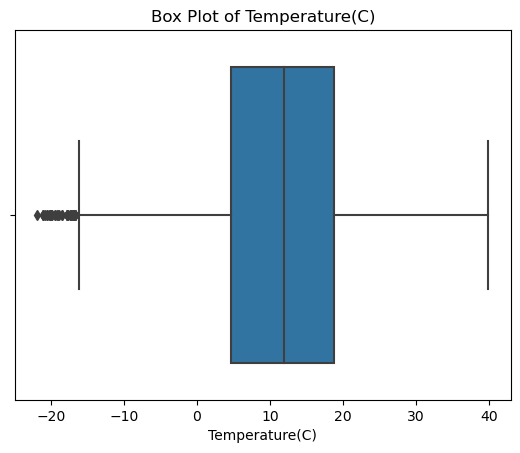

Lower Whisker: -16.55
Upper Whisker: 40.07222222222222
Number of Outliers: 44


In [42]:
column_name = 'Temperature(C)'

# Creating a box plot
sns.boxplot(data=df, x=column_name, orient='v')  # Set orient to 'v' for vertical orientation
plt.xlabel(column_name)
plt.title(f'Box Plot of {column_name}')
plt.show()
# Calculating the IQR (Interquartile Range)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# Printing the lower whisker, upper whisker, and number of outliers
print(f"Lower Whisker: {lower_bound}")
print(f"Upper Whisker: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
    

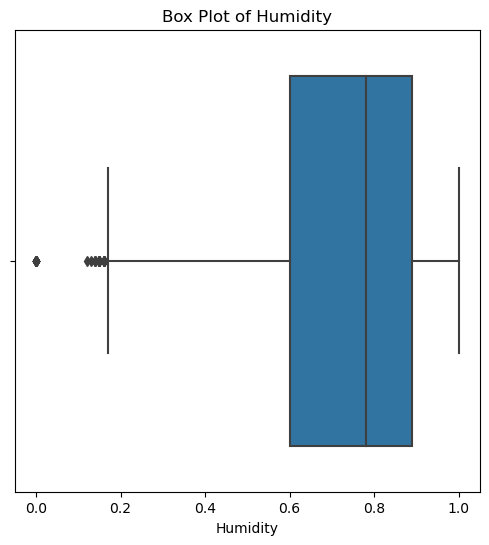

Lower Whisker: 0.16499999999999992
Upper Whisker: 1.3250000000000002
Number of Outliers: 46


In [43]:
column_name1 = 'Humidity'

# Creating a box plot
plt.figure(figsize=(6, 6))  # Adjust the figure size for the vertical display
sns.boxplot(data=df, x=column_name1, orient='v')  # Set orient to 'v' for vertical orientation
plt.xlabel(column_name1)
plt.title(f'Box Plot of {column_name1}')
plt.show()
# Calculating the IQR (Interquartile Range)
Q1 = df[column_name1].quantile(0.25)
Q3 = df[column_name1].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound1 = Q1 - 1.5 * IQR
upper_bound1 = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df[column_name1] < lower_bound1) | (df[column_name1] > upper_bound1)]

# Printing the lower whisker, upper whisker, and number of outliers
print(f"Lower Whisker: {lower_bound1}")
print(f"Upper Whisker: {upper_bound1}")
print(f"Number of Outliers: {outliers.shape[0]}")

### Histogram

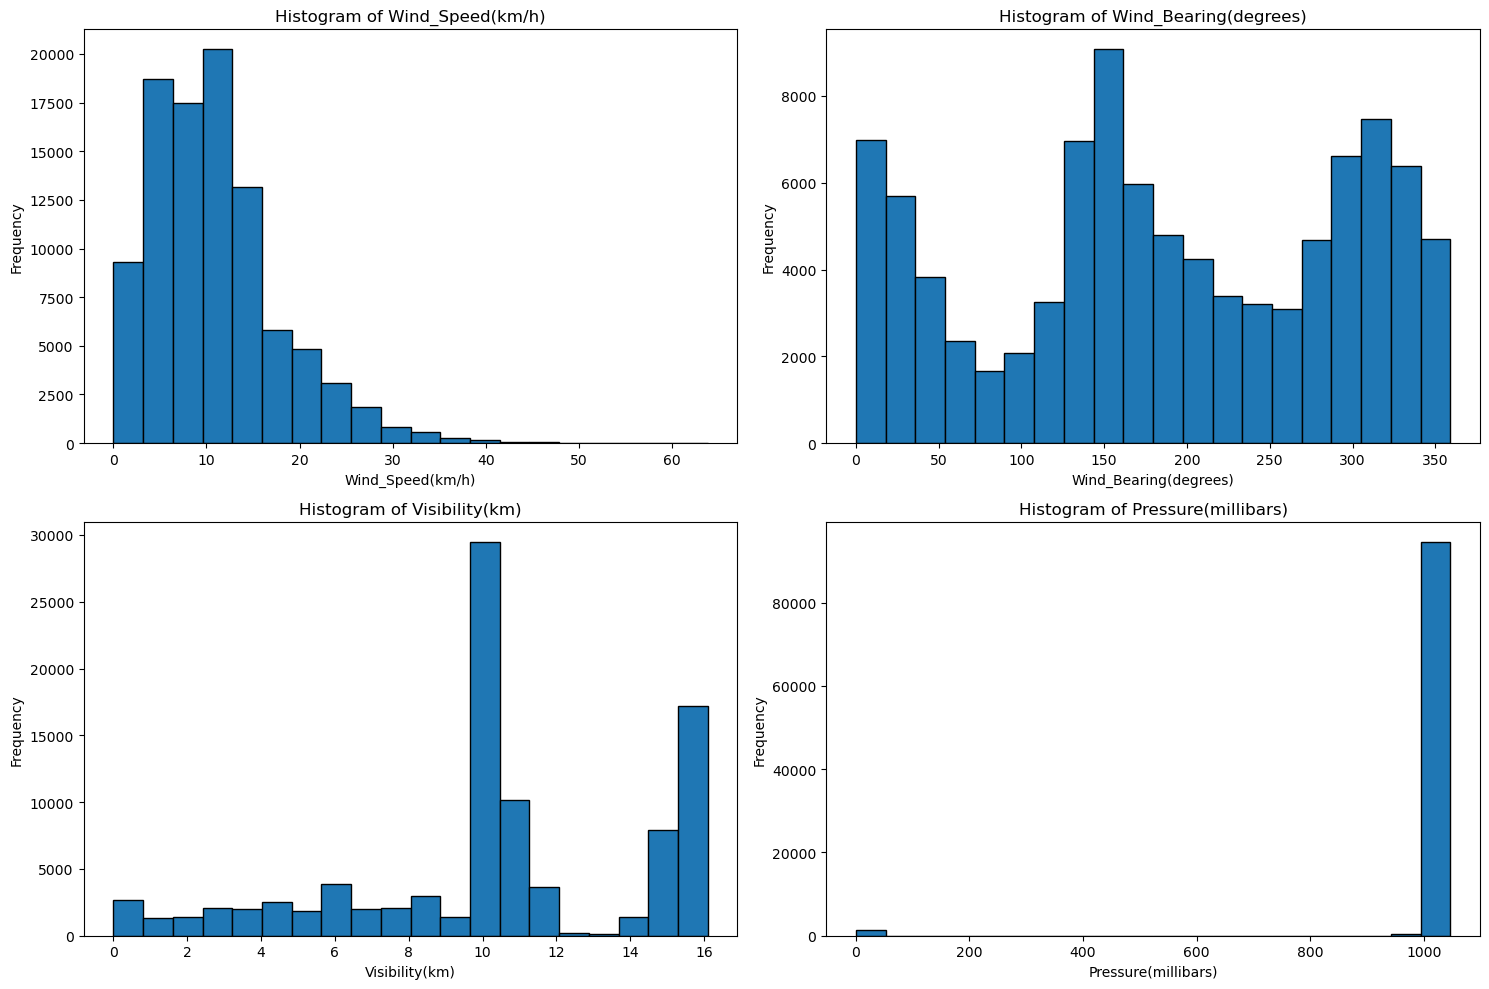

In [44]:
columns_to_check = ['Wind_Speed(km/h)', 'Wind_Bearing(degrees)', 'Visibility(km)', 'Pressure(millibars)']

# Setting the number of bins for the histograms
num_bins = 20

# Creating histograms for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[column], bins=num_bins, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

### Is the data balanced or imbalanced? Visualize. (should complete it)

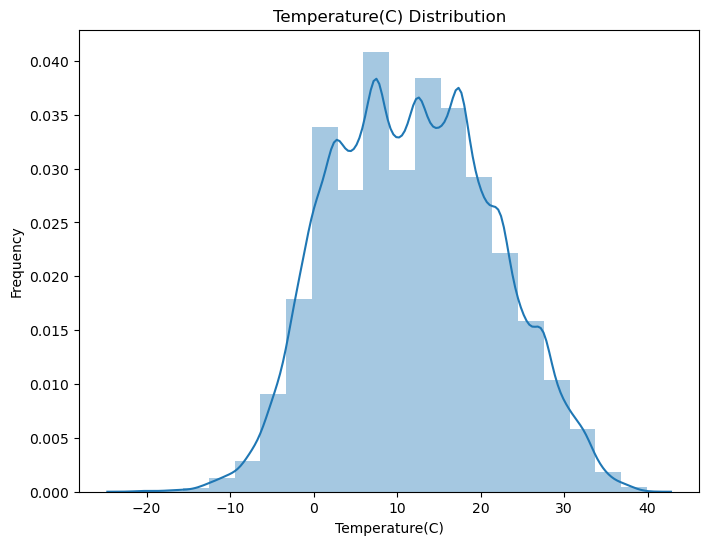

In [45]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Temperature(C)'], bins=20,kde=True)
plt.xlabel('Temperature(C)')
plt.ylabel('Frequency')
plt.title('Temperature(C) Distribution')
plt.show()

* Here we can clearly say that the "Temperature(c)" Coloumn is balanced

In [46]:
class_counts = df['Summary'].value_counts()

# Printing the class distribution
print("Class Distribution:")
print(class_counts)

# Checking if the data is balanced or imbalanced
if abs(class_counts[0] - class_counts[1]) <= 1:
    print("The data is approximately balanced.")
else:
    print("The data is imbalanced.")

Class Distribution:
Partly Cloudy                          31726
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10873
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                              

* Here we can say that the "Summary" Coloumn is imbalanced

In [47]:
# Calculating statistics for Temperature(C)
temperature_stats = df['Temperature(C)'].describe()
print(temperature_stats)

count    96429.000000
mean        11.929692
std          9.550492
min        -21.822222
25%          4.683333
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature(C), dtype: float64


### Are there any time-based trends or patterns?

#### For temperature(C)

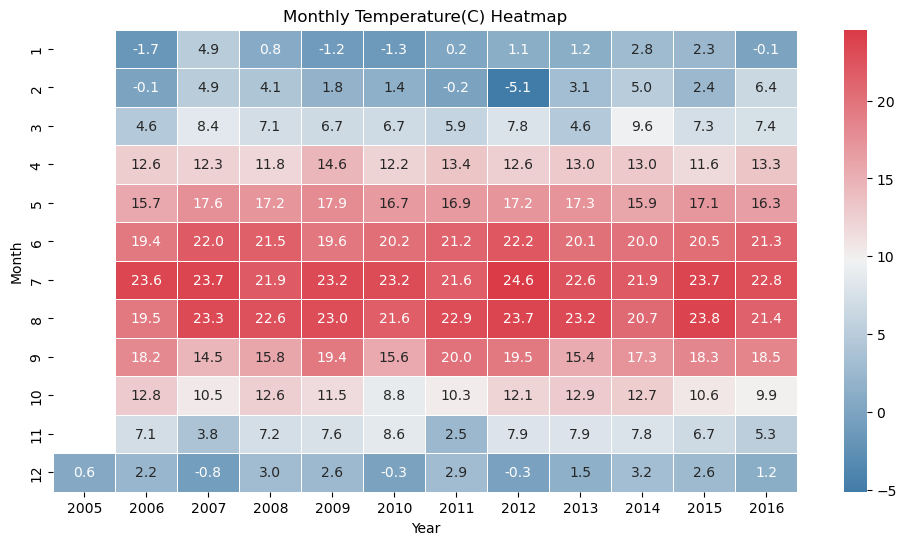

In [48]:
df['Formatted_Date'] = pd.to_datetime(df['Formatted_Date'], utc=True)

# Resampling the data to monthly averages
df_resampled = df.resample('M', on='Formatted_Date').mean()

# Pivot the data to create a heatmap
heatmap_data = df_resampled.pivot_table(index=df_resampled.index.month,
                                       columns=df_resampled.index.year,
                                       values='Temperature(C)')

# Creating a custom colormap (blue to white to red)
cmap = sns.diverging_palette(240, 10, n=20, as_cmap=True)

# Create the heatmap with the custom colormap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt='.1f', linewidths=0.5)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Monthly Temperature(C) Heatmap')
plt.show()

## For apparent temperature(C)

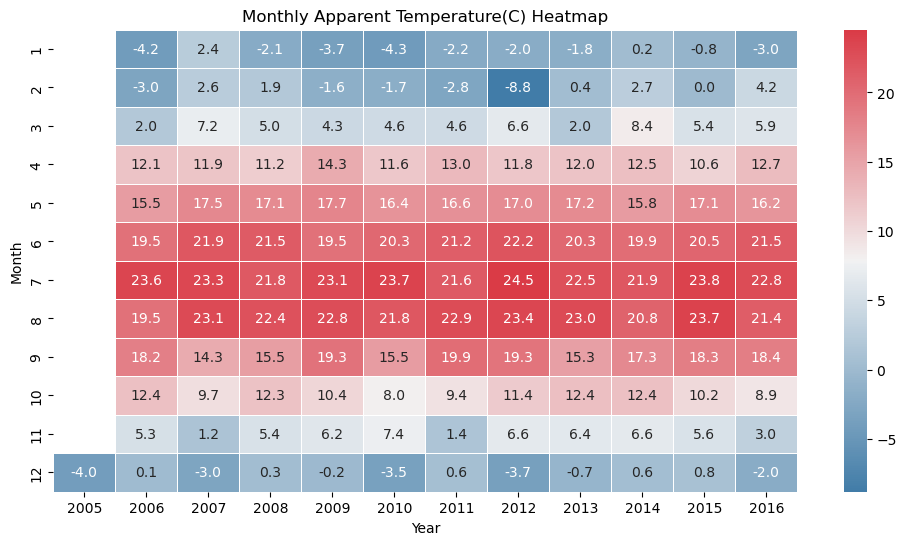

In [49]:
df['Formatted_Date'] = pd.to_datetime(df['Formatted_Date'], utc=True)

# Resampling the data to monthly averages
df_resampled = df.resample('M', on='Formatted_Date').mean()

# Pivot the data to create a heatmap
heatmap_data = df_resampled.pivot_table(index=df_resampled.index.month,
                                       columns=df_resampled.index.year,
                                       values='Apparent_Temperature(C)')

# Creating a custom colormap (blue to white to red)
cmap = sns.diverging_palette(240, 10, n=20, as_cmap=True)

# Creating the heatmap with the custom colormap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt='.1f', linewidths=0.5)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Monthly Apparent Temperature(C) Heatmap')
plt.show()

#### Are there any correlations between variables? Calculate correlations.

In [50]:
numerical_columns = ['Temperature(C)', 'Apparent_Temperature(C)', 'Humidity', 'Wind_Speed(km/h)', 'Wind_Bearing(degrees)', 'Visibility(km)', 'Pressure(millibars)']

# Calculate correlations
correlation_matrix = df[numerical_columns].corr()

# Creating a function to highlight cells with strong correlations
def highlight_correlations(val):
    color = 'background-color: lightcoral' if abs(val) >= 0.7 and val != 1.0 else ''
    return color

# Applying the styling function to the entire correlation matrix
styled_corr_matrix = correlation_matrix.style.applymap(highlight_correlations)

# Displaying the styled correlation matrix
styled_corr_matrix


,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure(millibars)
Temperature(C),1.000000,0.992625,-0.632331,0.009312,0.029888,0.392939,-0.005481
Apparent_Temperature(C),0.992625,1.000000,-0.602641,-0.056324,0.028926,0.381804,-0.000251
Humidity,-0.632331,-0.602641,1.000000,-0.225080,0.000689,-0.369282,0.005456
Wind_Speed(km/h),0.009312,-0.056324,-0.225080,1.000000,0.103939,0.100796,-0.049243
Wind_Bearing(degrees),0.029888,0.028926,0.000689,0.103939,1.000000,0.047582,-0.011665
Visibility(km),0.392939,0.381804,-0.369282,0.100796,0.047582,1.000000,0.059817
Pressure(millibars),-0.005481,-0.000251,0.005456,-0.049243,-0.011665,0.059817,1.000000


#### What is the highest and lowest temperature visualising it using line graph. 


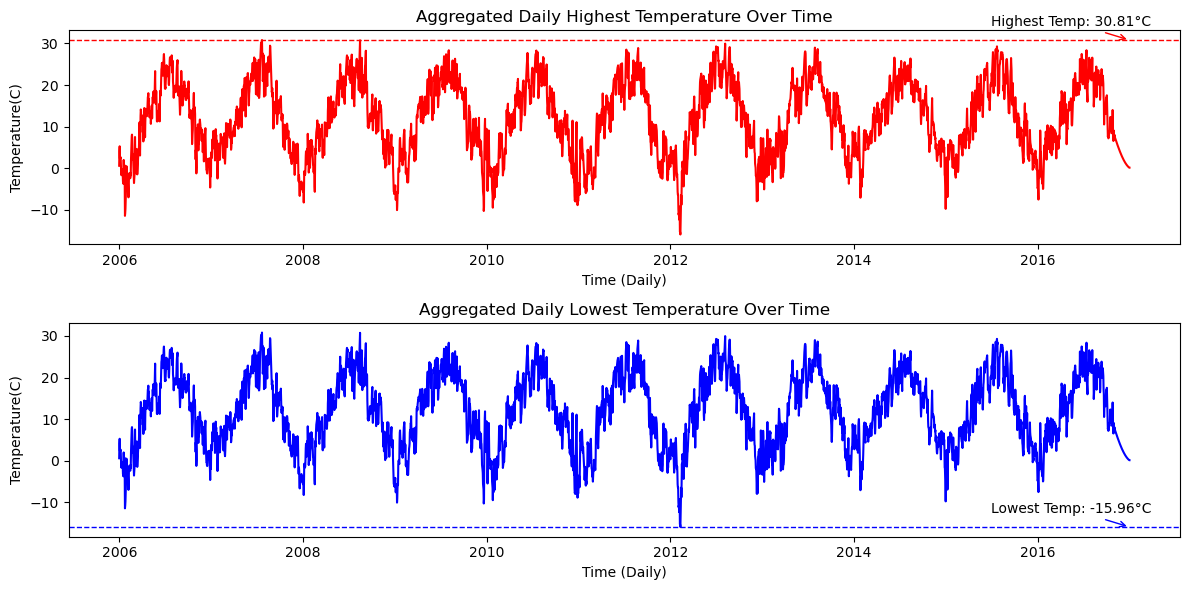

In [51]:
df['Formatted_Date'] = pd.to_datetime(df['Formatted_Date'], utc=True)

# Resampling the data to daily averages (you can adjust the frequency as needed)
df_daily = df.resample('D', on='Formatted_Date').mean()

# Finding the highest and lowest temperatures
highest_temperature = df_daily['Temperature(C)'].max()
lowest_temperature = df_daily['Temperature(C)'].min()

# Creating two separate plots for highest and lowest temperatures
plt.figure(figsize=(12, 6))

# Plotting aggregated daily highest temperature
plt.subplot(2, 1, 1)  # Two rows, one column, first plot
plt.plot(df_daily.index, df_daily['Temperature(C)'], color='red')
plt.xlabel('Time (Daily)')
plt.ylabel('Temperature(C)')
plt.title('Aggregated Daily Highest Temperature Over Time')
plt.annotate(f'Highest Temp: {highest_temperature:.2f}°C', xy=(df_daily.index[-1], highest_temperature), xytext=(-100, 10),
            textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))
plt.axhline(y=highest_temperature, color='red', linestyle='--', label=f'Highest Temp: {highest_temperature:.2f}°C', linewidth=1)

# Plotting aggregated daily lowest temperature
plt.subplot(2, 1, 2)  # Two rows, one column, second plot
plt.plot(df_daily.index, df_daily['Temperature(C)'], color='blue')
plt.xlabel('Time (Daily)')
plt.ylabel('Temperature(C)')
plt.title('Aggregated Daily Lowest Temperature Over Time')
plt.annotate(f'Lowest Temp: {lowest_temperature:.2f}°C', xy=(df_daily.index[-1], lowest_temperature), xytext=(-100, 10),
            textcoords='offset points', arrowprops=dict(arrowstyle="->", color='blue'))
plt.axhline(y=lowest_temperature, color='blue', linestyle='--', label=f'Lowest Temp: {lowest_temperature:.2f}°C', linewidth=1)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

#### What is the correlation between the Temperature and Apparent Temperature. 

In [52]:
temperature_column = 'Temperature(C)'
apparent_temperature_column = 'Apparent_Temperature(C)'

# Calculating the correlation
correlation = df[temperature_column].corr(df[apparent_temperature_column])

# Print the correlation
print(f'Correlation between {temperature_column} and {apparent_temperature_column}: {correlation:.2f}')

Correlation between Temperature(C) and Apparent_Temperature(C): 0.99


* The positive sign indicates a positive correlation. In other words, as Temperature(C) increases, Apparent_Temperature(C) tends to increase, and as Temperature(C) decreases, Apparent_Temperature(C) tends to decrease. This suggests a direct relationship: when it's hotter, both temperature measures tend to be higher, and when it's cooler, both tend to be lower

#### what is the Correlation between the Temperature and Humidity. 


In [53]:
temperature_column = 'Temperature(C)'
humidity_column = 'Humidity'

# Calculating the correlation
correlation = df[temperature_column].corr(df[humidity_column])

# Printing the correlation
print(f'Correlation between {temperature_column} and {humidity_column}: {correlation:.2f}')

Correlation between Temperature(C) and Humidity: -0.63


*  The negative sign indicates a negative correlation. In other words, as Temperature(C) increases, Humidity tends to decrease, and vice versa. This suggests an inverse relationship: when it's hotter, it's typically less humid, and when it's cooler, it's typically more humid.

#### On which time stamp we have farthest visibility range(km). 


In [54]:
max_visibility = df['Visibility(km)'].max()  # Find the maximum visibility value
timestamp_with_max_visibility = df[df['Visibility(km)'] == max_visibility]['Formatted_Date'].iloc[0]

print(f"Timestamp with Farthest Visibility Range: {timestamp_with_max_visibility}")
print(f"Max Visibility Range (km): {max_visibility}")

Timestamp with Farthest Visibility Range: 2006-08-23 17:00:00+00:00
Max Visibility Range (km): 16.1


#### Are there any repeated or missing values in the dataset if any are present represent them. 


In [55]:
# Checking for duplicate rows
duplicates = df[df.duplicated()]

In [56]:
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [57]:
# Checking for missing values
missing_values = df[df.isnull().any(axis=1)]

In [58]:
if not missing_values.empty:
    print("\nRows with Missing Values:")
    print(missing_values)
else:
    print("\nNo rows with missing values found.")


No rows with missing values found.


### On which day the lowest temperature is recorded and what is the precipitation type. 

In [59]:
# Finding the row with the lowest temperature
lowest_temp_row = df[df['Temperature(C)'] == df['Temperature(C)'].min()]

if not lowest_temp_row.empty:
    # Extracting the date and precipitation type from the row
    lowest_temp_date = lowest_temp_row['Formatted_Date'].iloc[0]
    lowest_temp_precip_type = lowest_temp_row['Precip_Type'].iloc[0]

    print(f"On {lowest_temp_date.date()}, the lowest temperature was recorded.")
    print(f"Precipitation Type: {lowest_temp_precip_type}")
else:
    print("No data found.")

On 2012-02-10, the lowest temperature was recorded.
Precipitation Type: snow


### How many types of precipitation are there in the given dataset

In [60]:
precipitation_types = df['Precip_Type'].unique()

if precipitation_types is not None:
    print(f"Number of Unique Precipitation Types: {len(precipitation_types)}")
    print("Precipitation Types:")
    for precip_type in precipitation_types:
        print(precip_type)
else:
    print("No data found in the 'Precip_Type' column.")

Number of Unique Precipitation Types: 2
Precipitation Types:
rain
snow


### Does wind bearing(degrees) has any effect on windspeed. 

In [61]:
wind_bearing_column = 'Wind_Bearing(degrees)'
wind_speed_column = 'Wind_Speed(km/h)'

# Calculating the correlation
correlation = df[wind_bearing_column].corr(df[wind_speed_column])

if abs(correlation) < 0.1:
    print("There is little to no linear correlation between Wind Bearing and Wind Speed.")
elif correlation > 0:
    print(f"There is a positive linear correlation between Wind Bearing and Wind Speed. (Correlation = {correlation:.2f})")
else:
    print(f"There is a negative linear correlation between Wind Bearing and Wind Speed. (Correlation = {correlation:.2f})")


There is a positive linear correlation between Wind Bearing and Wind Speed. (Correlation = 0.10)


* The positive sign indicates a positive correlation. In other words, as wind bearing increases (in a clockwise direction), wind speed tends to increase slightly, and as wind bearing decreases, wind speed tends to decrease slightly. However, the correlation is very weak, so this relationship is not strongly pronounced.


### What are the data types present in the given dataset. 

In [62]:
data_types = df.dtypes

# Displaying the data types
print("Data Types in the Dataset:")
print(data_types)

Data Types in the Dataset:
Formatted_Date             datetime64[ns, UTC]
Summary                                 object
Precip_Type                             object
Temperature(C)                         float64
Apparent_Temperature(C)                float64
Humidity                               float64
Wind_Speed(km/h)                       float64
Wind_Bearing(degrees)                    int32
Visibility(km)                         float64
Pressure(millibars)                    float64
Daily_Summary                           object
dtype: object


### Does rise in temperature has any effect on pressure

In [63]:
temperature_column = 'Temperature(C)'
pressure_column = 'Pressure(millibars)'

# Calculating the correlation
correlation= df[temperature_column].corr(df[pressure_column])

print(f"Correlation between {temperature_column} and {pressure_column}: {correlation:.2f}")

if abs(correlation) < 0.1:
    print("There is little to no linear correlation between Temperature and Pressure.")
elif correlation > 0:
    print(f"There is a positive linear correlation between Temperature and Pressure. (Correlation = {correlation:.2f})")
else:
    print(f"There is a negative linear correlation between Temperature and Pressure. (Correlation = {correlation:.2f})")

Correlation between Temperature(C) and Pressure(millibars): -0.01
There is little to no linear correlation between Temperature and Pressure.


*  The negative sign indicates a negative correlation, but the correlation is extremely weak. In practical terms, this correlation suggests that there is almost no linear relationship between temperature and pressure in your dataset. suggesting that changes in temperature have almost no impact on pressure in your dataset, at least in terms of a linear relationship.

### Does temperature follows any seasonal pattern. 

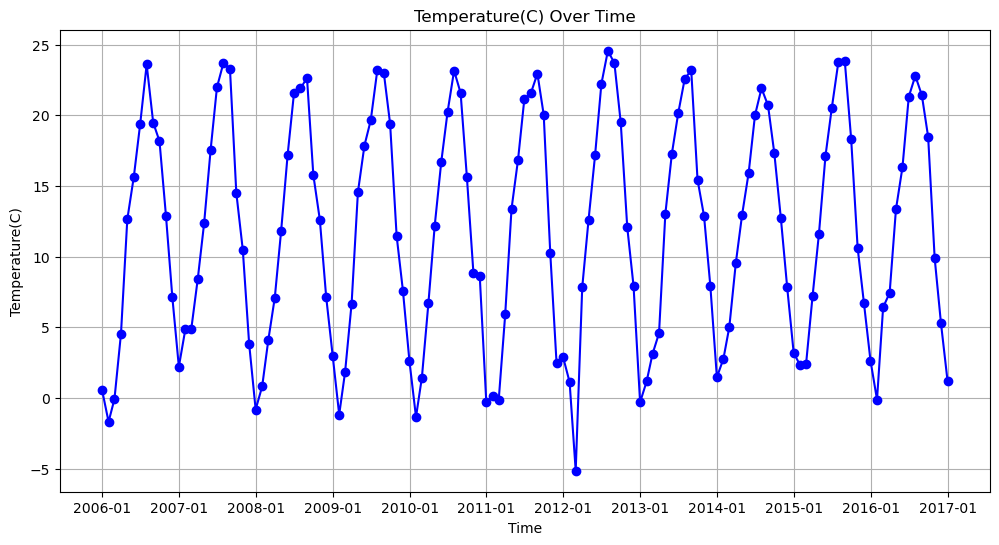

In [64]:
import matplotlib.dates as mdates


df['Formatted_Date'] = pd.to_datetime(df['Formatted_Date'], utc=True)

# Resampling the data to a specific time frequency (e.g., monthly) to analyze seasonality
resampled_data = df.set_index('Formatted_Date')['Temperature(C)'].resample('M').mean()

# Creating a time series plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting temperature data
ax.plot(resampled_data.index, resampled_data.values, marker='o', linestyle='-', color='blue')

# Formatting x-axis to show year and month
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Time')
plt.ylabel('Temperature(C)')
plt.title('Temperature(C) Over Time')
plt.grid(True)
plt.show()


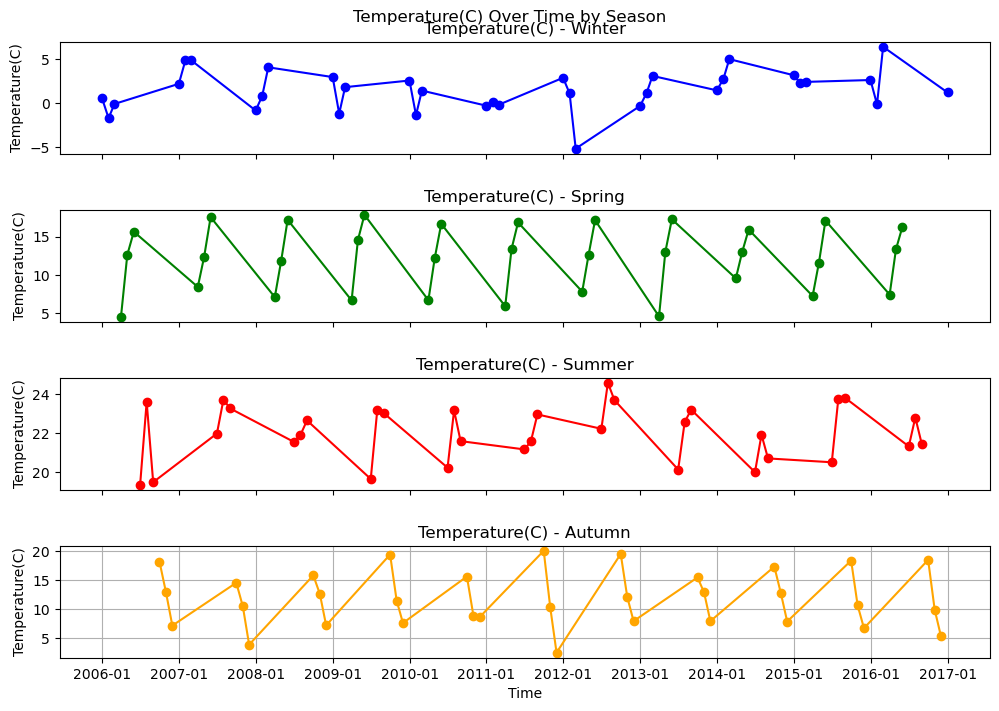

In [65]:
import matplotlib.dates as mdates

# Assuming you have a time column 'Formatted_Date' and a temperature column 'Temperature(C)'
df['Formatted_Date'] = pd.to_datetime(df['Formatted_Date'], utc=True)

# Resampling the data to a specific time frequency (e.g., monthly) to analyze seasonality
resampled_data = df.set_index('Formatted_Date')['Temperature(C)'].resample('M').mean()

# Defining seasons based on months and corresponding colors
seasons = {
    'Winter': {'months': [12, 1, 2], 'color': 'blue'},
    'Spring': {'months': [3, 4, 5], 'color': 'green'},
    'Summer': {'months': [6, 7, 8], 'color': 'red'},
    'Autumn': {'months': [9, 10, 11], 'color': 'orange'},
}

# Creating subplots for each season
fig, axes = plt.subplots(len(seasons), 1, figsize=(12, 8), sharex=True)

# Iterating over seasons and plot data for each season
for i, (season, data) in enumerate(seasons.items()):
    season_data = resampled_data[resampled_data.index.month.isin(data['months'])]
    if not season_data.empty:
        axes[i].plot(season_data.index, season_data.values, marker='o', linestyle='-', color=data['color'])
        axes[i].set_ylabel('Temperature(C)')
        axes[i].set_title(f'Temperature(C) - {season}')

# Formating x-axis to show year and month on the last subplot
axes[-1].xaxis.set_major_locator(mdates.YearLocator())
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Time')
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Temperature(C) Over Time by Season', y=0.92)
plt.grid(True)
plt.show()


# What is the distribution of wind speeds in the dataset, and how does it vary with temperature? 

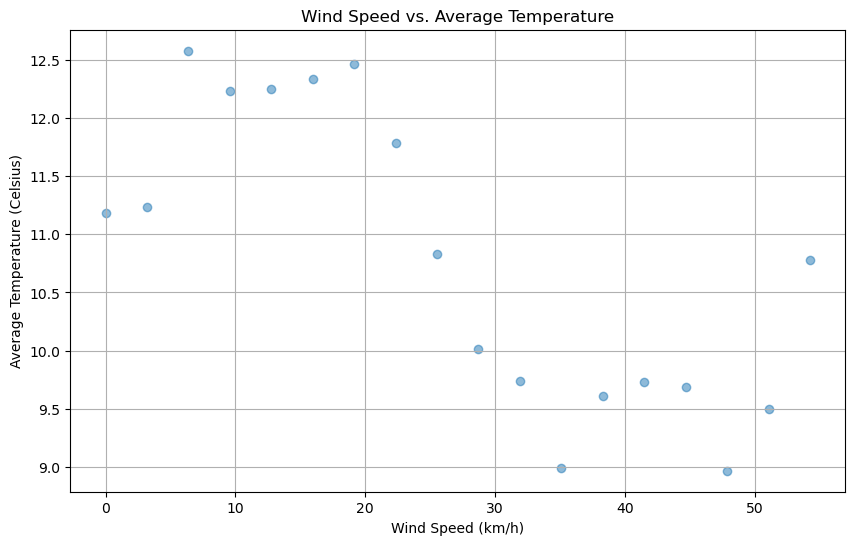

In [66]:
num_bins = 20

# Creating wind speed bins
wind_speed_bins = np.linspace(df['Wind_Speed(km/h)'].min(), df['Wind_Speed(km/h)'].max(), num_bins + 1)

# Calculating average temperature in each wind speed bin
average_temperatures = []
for i in range(len(wind_speed_bins) - 1):
    bin_start = wind_speed_bins[i]
    bin_end = wind_speed_bins[i + 1]
    mask = (df['Wind_Speed(km/h)'] >= bin_start) & (df['Wind_Speed(km/h)'] < bin_end)
    average_temp = df.loc[mask, 'Temperature(C)'].mean()
    average_temperatures.append(average_temp)

# Creating a scatter plot with one point per bin
plt.figure(figsize=(10, 6))
plt.scatter(wind_speed_bins[:-1], average_temperatures, alpha=0.5)
plt.title('Wind Speed vs. Average Temperature')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Average Temperature (Celsius)')
plt.grid(True)

plt.show()

* as observed above the wind speed is more when the temperature is low and wind speed is less when temperature is high

# Is there a correlation between humidity and precipitation type?

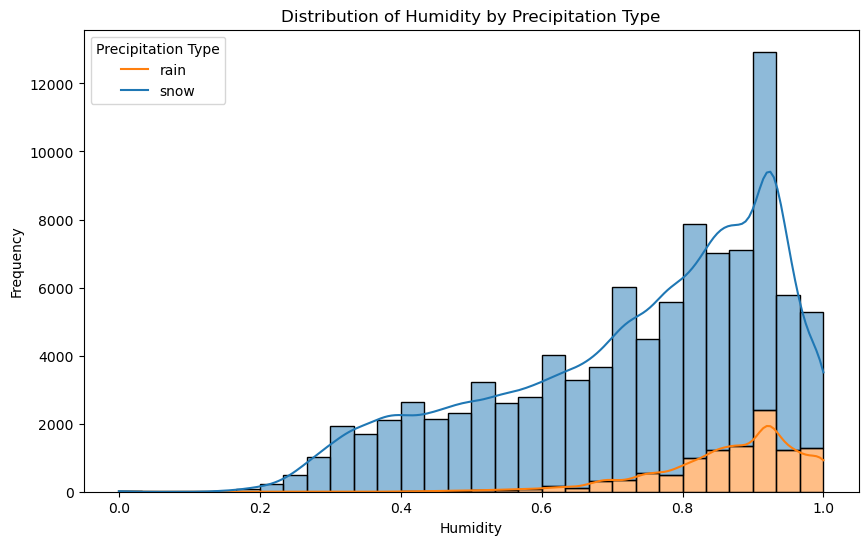

In [67]:
# Creating separate histograms or density plots for humidity by precipitation type
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Humidity', hue='Precip_Type', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Humidity by Precipitation Type')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

# Specifying legend labels
legend_labels = df['Precip_Type'].unique()
plt.legend(title='Precipitation Type', labels=legend_labels)

plt.show()


* rain and snow increases relatively as humidity increases
* A higher dew point signifies more moisture in the air, resulting in oppressively humid conditions with the possibility for cloud and precipitation.

# Are there any significant trends or patterns in visibility over time?

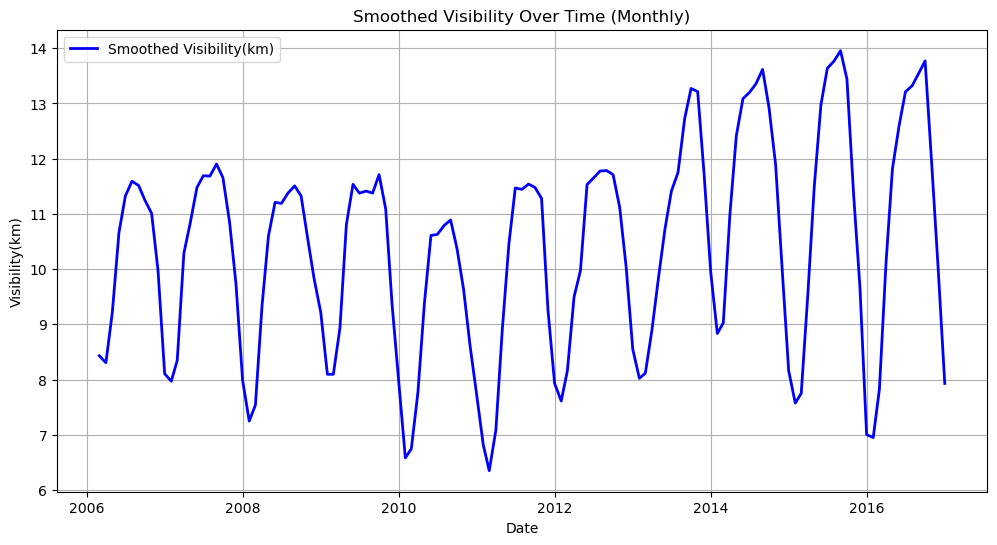

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a copy of your DataFrame
df_copy = df.copy()

# Converting the 'Formatted_Date' column to datetime format
df_copy['Formatted_Date'] = pd.to_datetime(df_copy['Formatted_Date'])

# Set the 'Formatted_Date' column as the index
df_copy.set_index('Formatted_Date', inplace=True)

# Resampling the data to monthly intervals and calculate the mean visibility
monthly_visibility = df_copy['Visibility(km)'].resample('M').mean()

# Applying a rolling mean to smooth the data (e.g., a 3-month rolling mean)
rolling_mean = monthly_visibility.rolling(window=3).mean()

# Creating a time series plot for smoothed visibility
plt.figure(figsize=(12, 6))
plt.plot(rolling_mean.index, rolling_mean, color='blue', linewidth=2, label='Smoothed Visibility(km)')
plt.title('Smoothed Visibility Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Visibility(km)')
plt.grid(True)
plt.legend()
plt.show()


# What is the distribution of pressure (millibars) during different weather conditions?

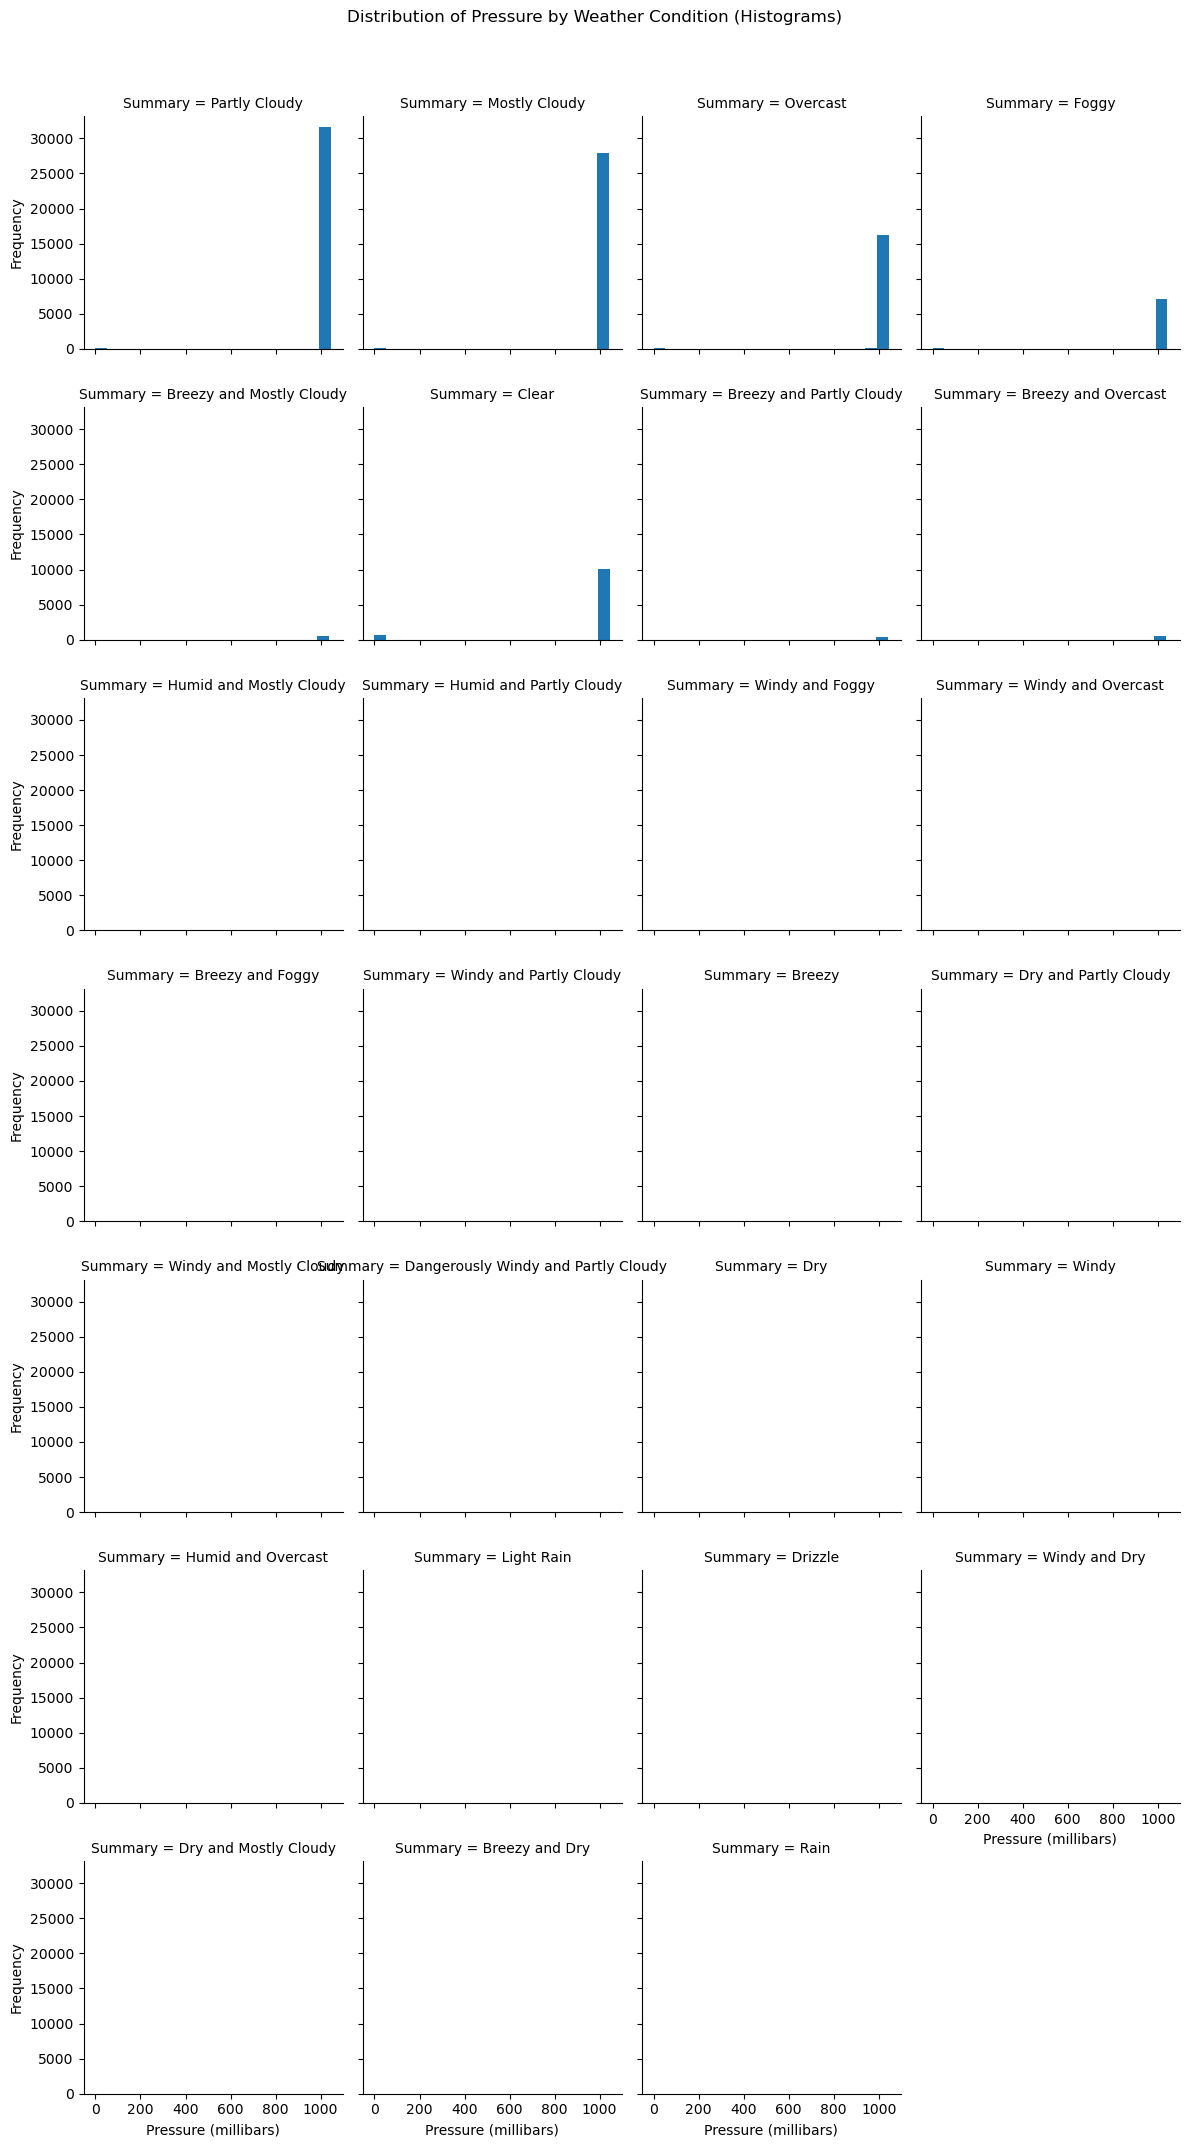

In [69]:
# Creating a grid of histograms for each weather condition
g = sns.FacetGrid(df, col='Summary', col_wrap=4, height=3, margin_titles=True)
g.map(plt.hist, 'Pressure(millibars)', bins=20)
g.set_axis_labels('Pressure (millibars)', 'Frequency')
plt.suptitle('Distribution of Pressure by Weather Condition (Histograms)', y=1.02)
plt.tight_layout()
plt.show()

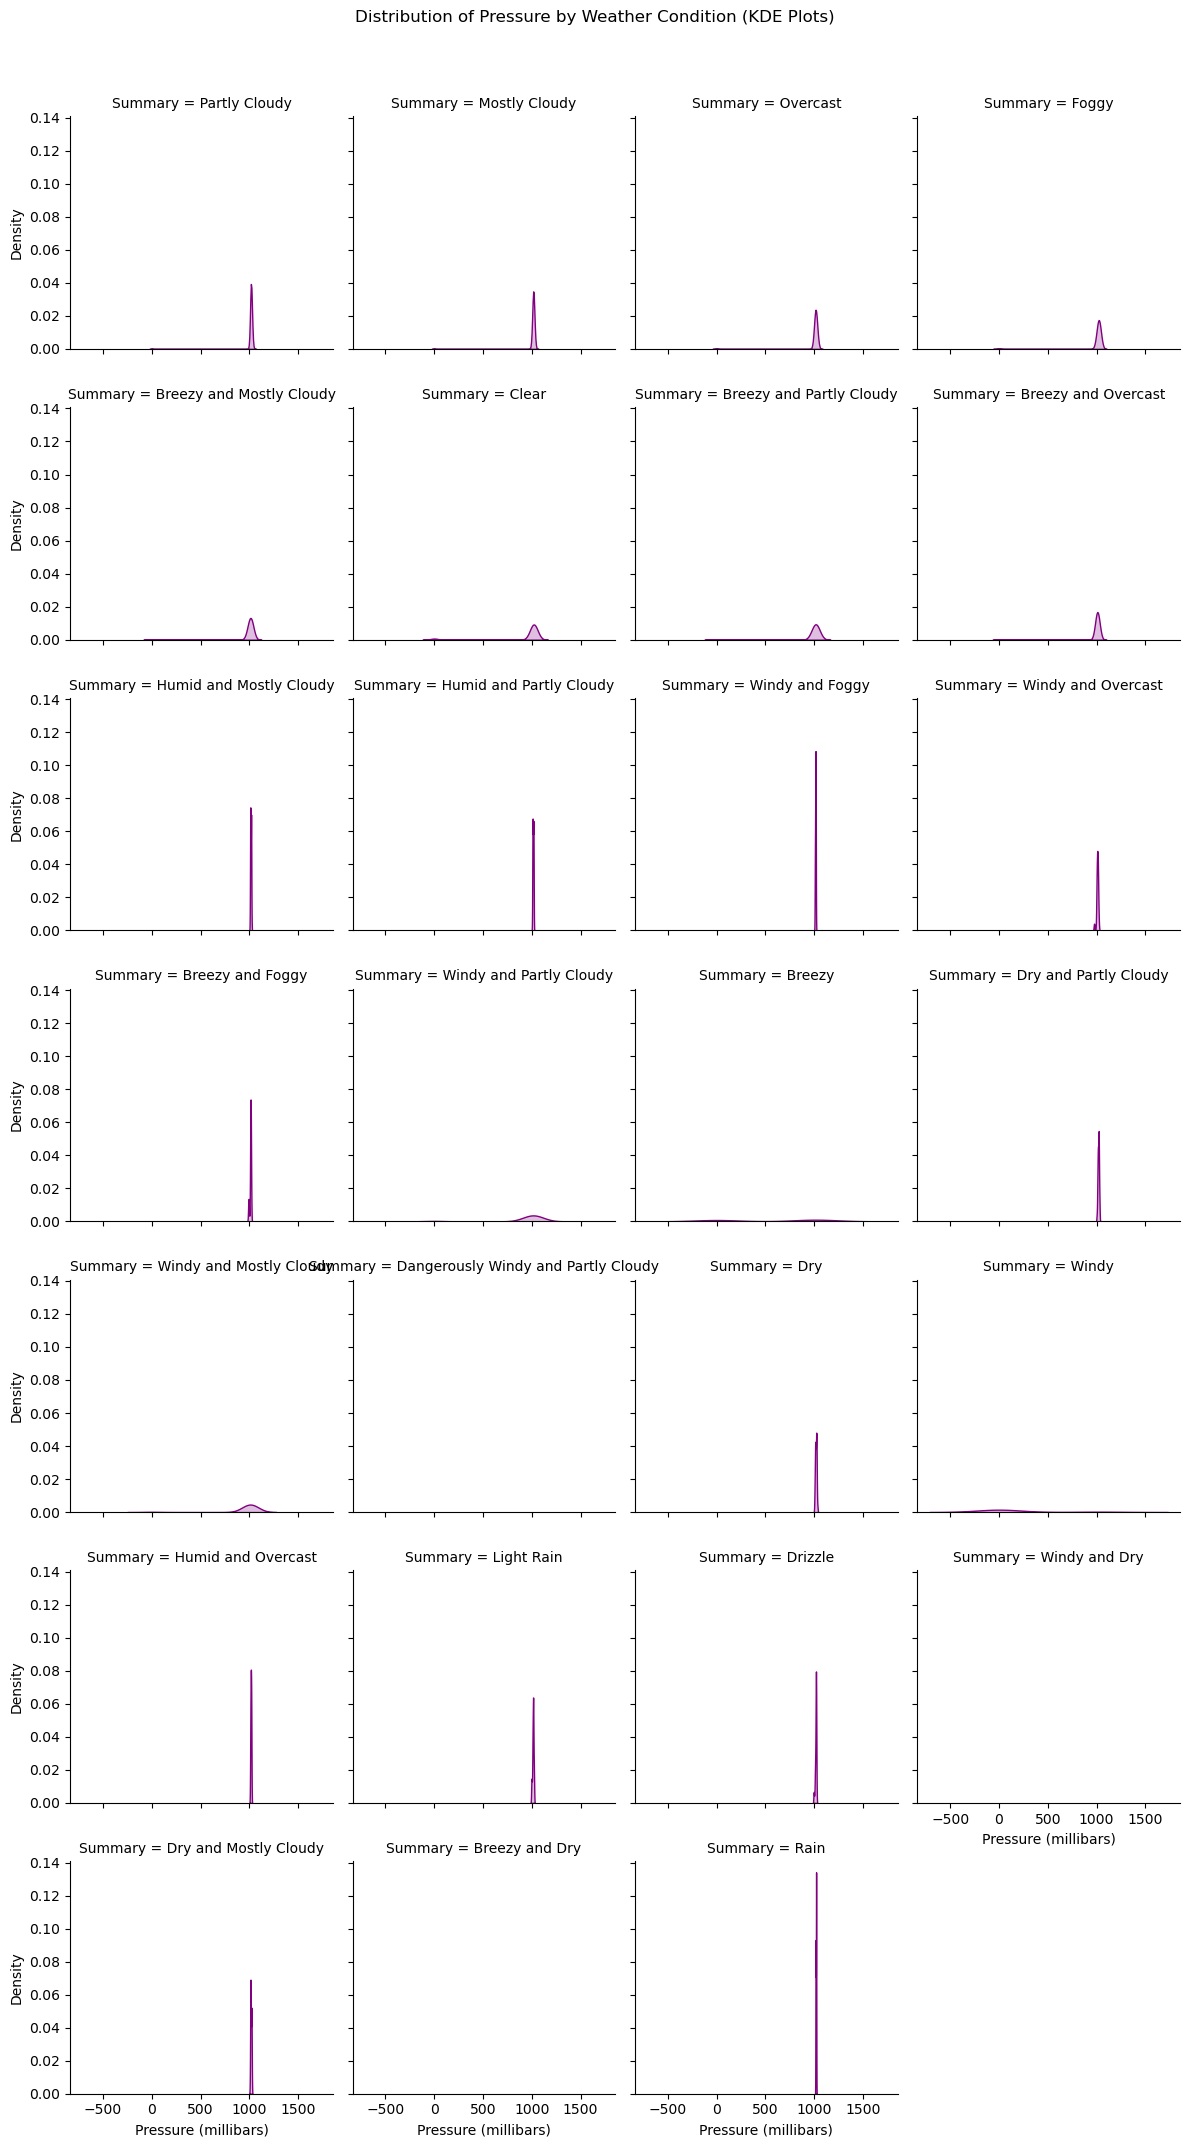

In [70]:
g = sns.FacetGrid(df, col='Summary', col_wrap=4, height=3, margin_titles=True)
g.map(sns.kdeplot, 'Pressure(millibars)', color='purple', shade=True)
g.set_axis_labels('Pressure (millibars)', 'Density')
plt.suptitle('Distribution of Pressure by Weather Condition (KDE Plots)', y=1.02)
plt.tight_layout()
plt.show()

# Can you identify any outliers in the "Apparent_Temperature(C)" column during extreme weather events?

In [71]:
# Defining conditions for extreme weather events, e.g., "Rain" or "Snow"
extreme_conditions = ["Rain", "Snow"]

# Creating a subset of the data for extreme weather events
extreme_weather_df = df[df['Summary'].isin(extreme_conditions)]

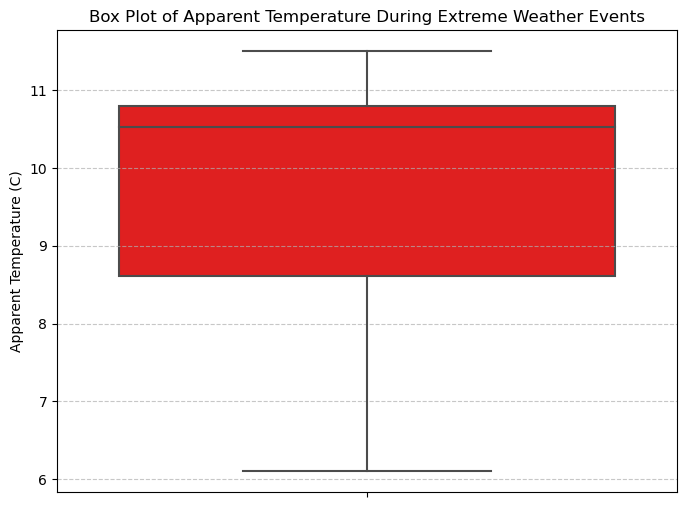

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a box plot for "Apparent_Temperature(C)" during extreme weather events
plt.figure(figsize=(8, 6))
sns.boxplot(data=extreme_weather_df, y='Apparent_Temperature(C)', color='red')
plt.title('Box Plot of Apparent Temperature During Extreme Weather Events')
plt.ylabel('Apparent Temperature (C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Univariate analysis

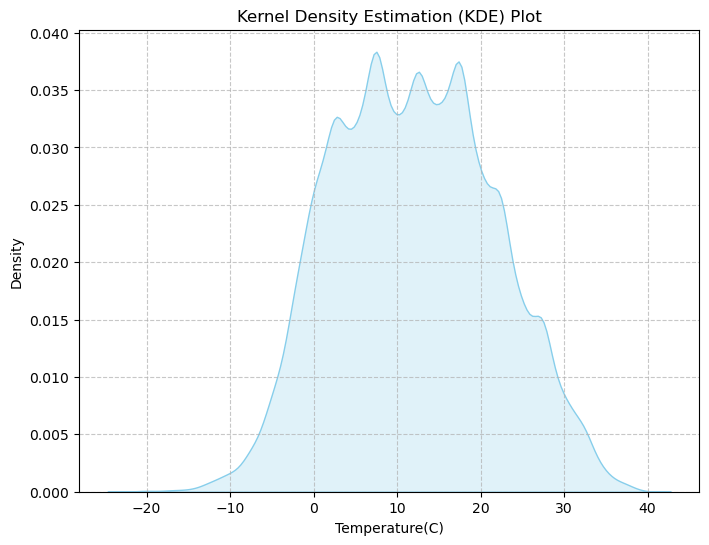

In [73]:
# KDE plot for a column
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Temperature(C)'], shade=True, color='skyblue')
plt.title('Kernel Density Estimation (KDE) Plot')
plt.xlabel('Temperature(C)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

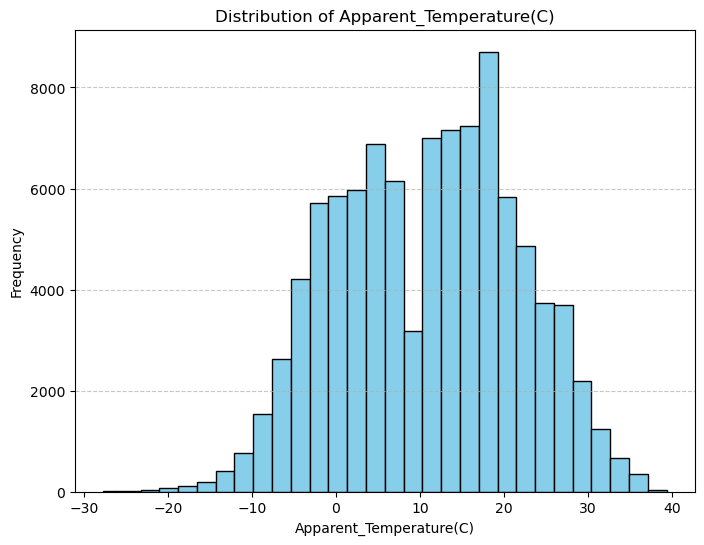

In [74]:
# histogram for Apparent_Temperature(C)
plt.figure(figsize=(8, 6))
plt.hist(df['Apparent_Temperature(C)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Apparent_Temperature(C)')
plt.xlabel('Apparent_Temperature(C)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

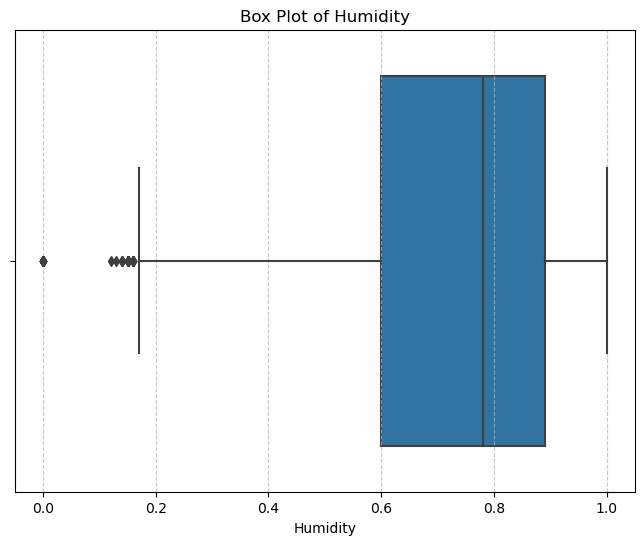

In [75]:
# box plot for Humidity
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Humidity', orient='h')
plt.title('Box Plot of Humidity')
plt.xlabel('Humidity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

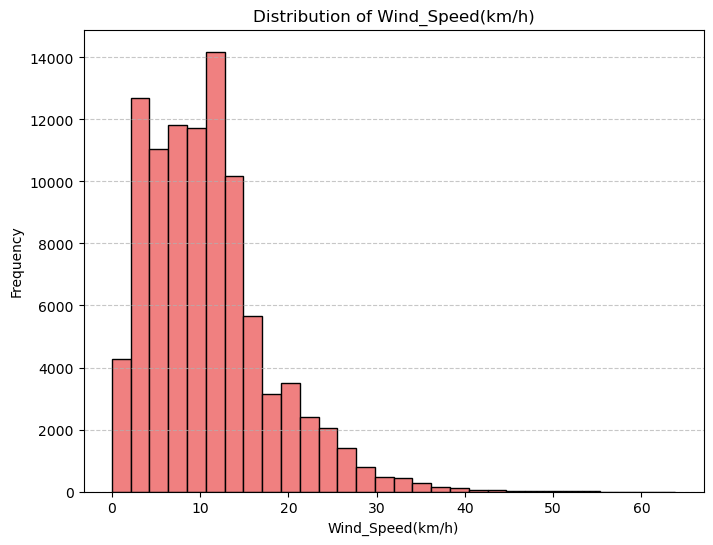

In [76]:
# Creating a histogram for Wind_Speed(km/h)
plt.figure(figsize=(8, 6))
plt.hist(df['Wind_Speed(km/h)'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Wind_Speed(km/h)')
plt.xlabel('Wind_Speed(km/h)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

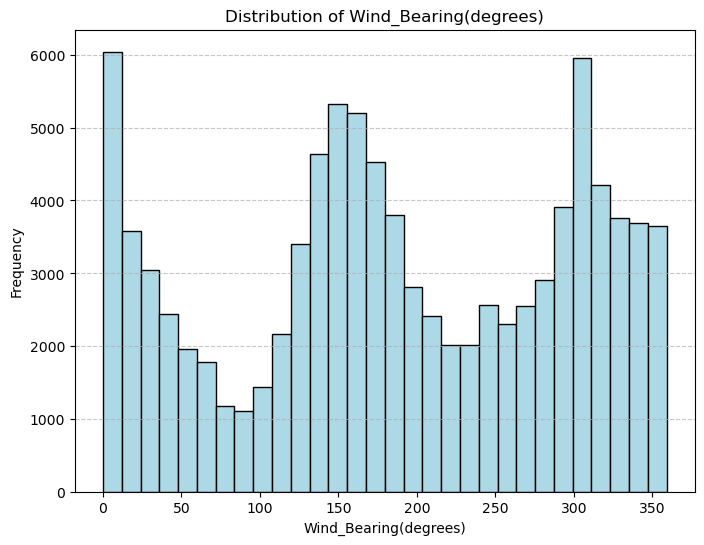

In [77]:
# Creating a histogram for Wind_Bearing(degrees)
plt.figure(figsize=(8, 6))
plt.hist(df['Wind_Bearing(degrees)'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Wind_Bearing(degrees)')
plt.xlabel('Wind_Bearing(degrees)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

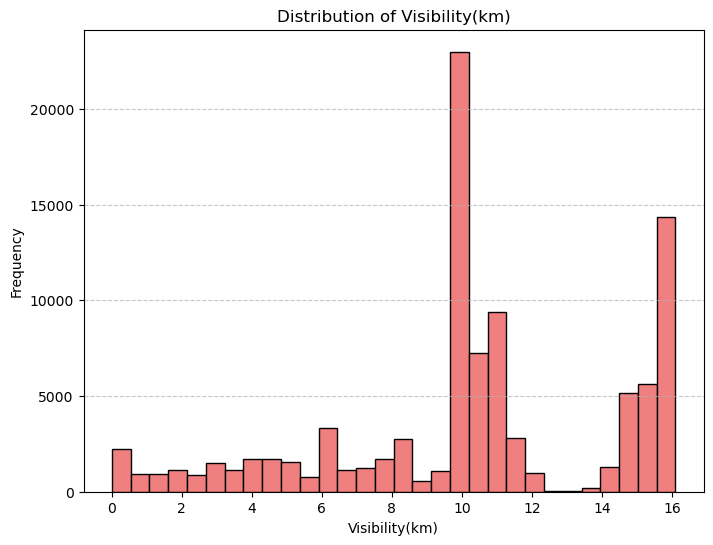

In [78]:
# Creating a histogram for Visibility(km)
plt.figure(figsize=(8, 6))
plt.hist(df['Visibility(km)'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Visibility(km)')
plt.xlabel('Visibility(km)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bivariate analysis

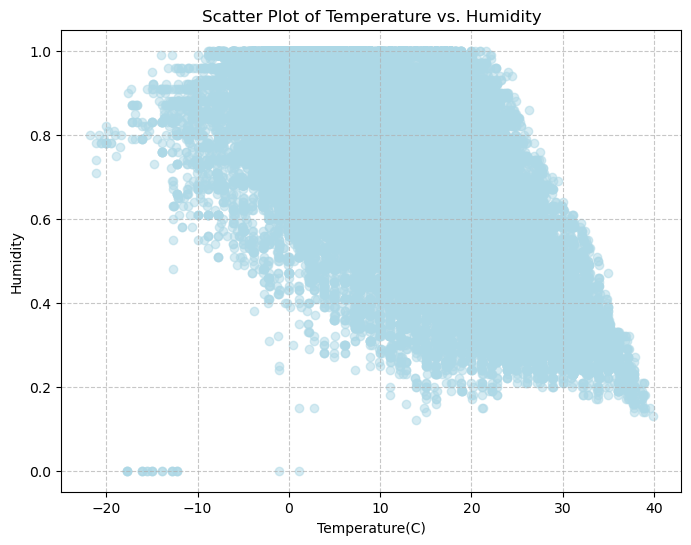

In [79]:
# Creating a scatter plot for Temperature vs. Humidity
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature(C)'], df['Humidity'], color='lightblue', alpha=0.5)
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.xlabel('Temperature(C)')
plt.ylabel('Humidity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

* as temperature increases, humidity decreases. It suggests corelation

In [80]:
correlation = df['Wind_Speed(km/h)'].corr(df['Humidity'])
print(f'Correlation between Wind_Speed(km/h) and Humidity: {correlation:.2f}')


Correlation between Wind_Speed(km/h) and Humidity: -0.23


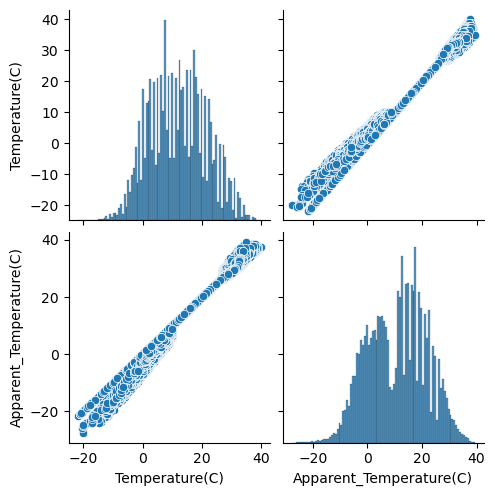

In [81]:
import seaborn as sns
sns.pairplot(df[['Temperature(C)', 'Apparent_Temperature(C)']])
plt.show()

In [82]:
df.head()

,Formatted_Date,Summary,Precip_Type,Temperature(C),Apparent_Temperature(C),Humidity,Wind_Speed(km/h),Wind_Bearing(degrees),Visibility(km),Pressure(millibars),Daily_Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


# Multivariate

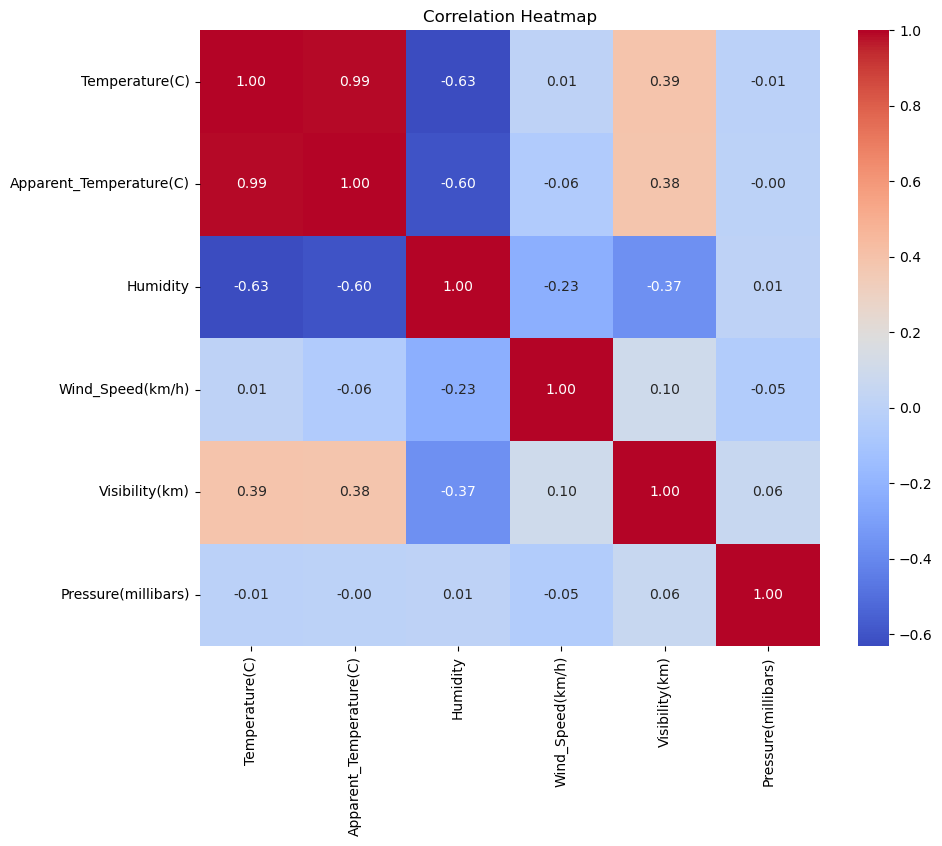

In [83]:
# Calculat ingcorrelations between numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Creating a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Distribution

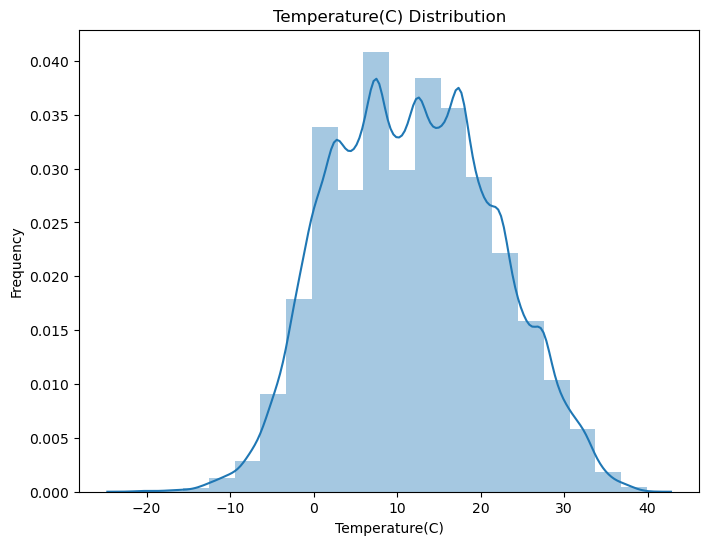

In [84]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Temperature(C)'], bins=20,kde=True)
plt.xlabel('Temperature(C)')
plt.ylabel('Frequency')
plt.title('Temperature(C) Distribution')
plt.show()

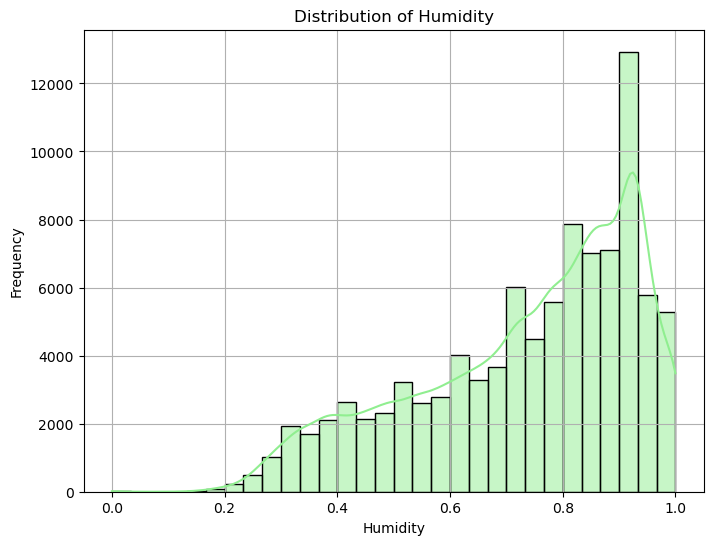

In [87]:
data = df['Humidity']
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, color='lightgreen', edgecolor='black',kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Hypothesis Testing

* Null Hypothesis (H0): There is no significant difference in temperature between rainy days and non-rainy days.
* Alternative Hypothesis (H1): There is a significant difference in temperature between rainy days and non-rainy days.

using t-test

In [88]:
import pandas as pd
from scipy.stats import ttest_ind


# Creating two groups: Temperature on rainy days and non-rainy days
temperature_rainy = df[df['Precip_Type'] == 'rain']['Temperature(C)']
temperature_non_rainy = df[df['Precip_Type'] == 'non-rain']['Temperature(C)']

# Performing a t-test
t_stat, p_value = ttest_ind(temperature_rainy, temperature_non_rainy, equal_var=False)

# Defining the significance level (alpha)
alpha = 0.05

# Checking if the p-value is less than alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in temperature between rainy and non-rainy days.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in temperature between rainy and non-rainy days.")


Fail to reject the null hypothesis. There is no significant difference in temperature between rainy and non-rainy days.


* Null Hypothesis (H0): There is no correlation between two variables (e.g., Temperature and Humidity).
* Alternative Hypothesis (H1): There is a correlation between two variables.

### i) Pearson correlation

In [89]:
from scipy.stats import pearsonr

# Assuming 'Temperature' and 'Humidity'
corr, p_value = pearsonr(df['Temperature(C)'], df['Humidity'])

# Displaying the results
print("Pearson's Correlation Coefficient:", corr)
print("P-value:", p_value)

if p_value < 0.05:  # choosing a significance level (e.g., 0.05)
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Pearson's Correlation Coefficient: -0.6323310338509763
P-value: 0.0
There is a significant correlation.


### ii) Spearman's correlation

In [90]:
from scipy.stats import spearmanr

# Assuming 'Temperature' and 'Humidity' 
corr, p_value = spearmanr(df['Temperature(C)'], df['Humidity'])

# Displaying the results
print("Spearman's Rank Correlation Coefficient:", corr)
print("P-value:", p_value)

if p_value < 0.05:  # choosing a significance level (e.g., 0.05)
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")


Spearman's Rank Correlation Coefficient: -0.5881866469796151
P-value: 0.0
There is a significant correlation.
